# Capturing Image and saving it into the active directory 

In [1]:
#pip install pydotplus

In [3]:
import datetime
#from datetime import datetime
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")


img_counter = 0

while True:
    ret, frame = cam.read()
    # Put current DateTime on each frame
    '''font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,str(datetime.now()),(10,30), font, 1,(255,255,255),2,cv2.LINE_AA)'''
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

Escape hit, closing...


# Reading the captured image and using searching for the red patch using masking

# Image to text - Tesseract | Pillow

In [3]:
#!pip install pillow

In [4]:
#!pip install pytesseract

In [5]:
#!pip install tesseract

In [6]:
#!pip install tesseract-ocr

In [7]:
from PIL import Image #image processing

In [8]:
import pytesseract #convert image to text

In [9]:
pwd # for image

'C:\\Users\\ppara\\Downloads'

In [10]:
img = Image.open("C:/Users/ppara/Downloads/AIML Cargo pics/4.jpg") # image path

In [11]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [12]:
result = pytesseract.image_to_string(img, lang = 'eng') #image to result and saves it

In [13]:
print('Raw text from image is: ',result)

Raw text from image is:  UACU 518232 [f
ASG >



# Cleaning retrived text

In [14]:
import re

In [15]:
r1 = re.findall(r"^\D+",result)
r2 = re.findall(r"\d+",result)
r3 = re.findall(r"\S+",result)
#r4 = re.findall(r"[a-zA-Z0-9]\S+[a-zA-Z0-9]",result)
r4 = re.findall(r"\S[a-zA-Z0-9]\w*",result)

In [16]:
print('R1: ',r1)
print('R2: ',r2)
print('R3: ',r3)
print('R4: ',r4)

R1:  ['UACU ']
R2:  ['518232']
R3:  ['UACU', '518232', '[f', 'ASG', '>']
R4:  ['UACU', '518232', '[f', 'ASG']


In [17]:
list_join=""
for i in r4[:2]:
    list_join += str(i) + "-"
    list_join = list_join[:-1]
print('Container Id: ',list_join)

Container Id:  UACU518232


# RED PATTERN for damage detection - Yes/No

In [18]:
#!pip install cv2
#!pip install --upgrade pip
#!pip3 install opencv-python

In [19]:
import cv2
import numpy as np
img = cv2.imread("C:/Users/ppara/Downloads/AIML Cargo pics/4.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(img_hsv, (0, 70, 50), (10, 255, 255))
mask2 = cv2.inRange(img_hsv, (170, 70, 50), (180, 255, 255))
mask = cv2.bitwise_or(mask1, mask2 )
croped = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("mask", mask)
cv2.imshow("croped", croped)
cv2.waitKey(1)
cv2.destroyAllWindows()


In [20]:
if (mask == 1).sum() > 1:
    print("Nothing")
    # do your stuff

In [21]:
# Binary mask with pixels matching the color threshold in white
mask = cv2.bitwise_or(mask1, mask2)
dmgflag = 'No'
# Determine if the color exists on the image
if cv2.countNonZero(mask) > 0:
    print('Red is present!')
    dmgflag='1'
else:
    print('Red is not present!')

Red is present!


# Importing required packages and libraries
# Reading Dataset

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import itertools 

In [23]:
df = pd.read_csv("C:/Users/ppara/Desktop/AML_lab_dataset.csv",index_col='index')

In [24]:
df.columns = ['container id', 'date', 'city', 'Temperature',
       'Mode of Transport', 'Fork Type', 'External', 'Refrigerated',
       'Damage']

In [25]:
df

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
index,,,,,,,,,
1,VPYR190662,23-09-2010,Purnea,30,land,Industrial Forklift,No,No,No
2,OAKF997890,15-10-2015,Joliet,12,land,Walkie Stacker,Yes,No,Yes
3,TAUV405783,11-10-2008,Taber,37,air,Pallet Jack,Yes,Yes,Yes
4,FNBW586962,18-09-2022,Shimla,5,land,Pallet Jack,No,No,Yes
5,CWGP237272,06-11-2018,Miami,38,air,Rough Terrain Forklift,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
19996,PJGY222556,09-03-2008,Silchar,28,land,Telehandler,Yes,No,Yes
19997,AJOE772324,07-01-2009,Trivandrum,25,land,Walkie Stacker,Yes,Yes,Yes
19998,XJEK284268,22-02-2017,Gary,39,water,Telehandler,Yes,Yes,Yes


In [26]:
for i in range(0,len(df)):
  if df.iloc[i,3] <=10 and df.iloc[i,5]=='Pallet Jack':
    df.iloc[i,8]=1
  else:
    df.iloc[i,8]=0

In [27]:
for i in range(0,len(df)):
  if df.iloc[i,3]>=40:
    df.iloc[i,8]=1
  else:
    df.iloc[i,8]=0

In [28]:
for i in range(0,len(df)):
  if df.iloc[i,7]=='No' and df.iloc[i,3]>34:
    df.iloc[i,8]=1
  else:
    df.iloc[i,8]=0

In [29]:
df.tail()

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
index,,,,,,,,,
19996,PJGY222556,09-03-2008,Silchar,28,land,Telehandler,Yes,No,0
19997,AJOE772324,07-01-2009,Trivandrum,25,land,Walkie Stacker,Yes,Yes,0
19998,XJEK284268,22-02-2017,Gary,39,water,Telehandler,Yes,Yes,0
19999,UMYR952437,18-03-2016,Haridwar,45,air,Rough Terrain Forklift,Yes,No,1
20000,DIBM828271,23-05-2017,Provo,44,land,Counterbalance Forklift,Yes,No,1


# Appending the retrieved container data with other necessary details
# Retrieving Weather Info using API

In [30]:
print("Container Id was succesully Detected, Please provide details related to the shipment.")
ab=input(" City? : ")



import requests, json
 
# Enter your API key here
api_key = "ad13ba9b4f101bb1966600a9f90a1b43"
 
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
 
# Give city name
city_name = ab
 
# complete_url variable to store
# complete url address
complete_url = base_url + "appid=" + api_key + "&q=" + city_name
 
# get method of requests module
# return response object
response = requests.get(complete_url)
 
# json method of response object
# convert json format data into
# python format data
x = response.json()
 
# Now x contains list of nested dictionaries
# Check the value of "cod" key is equal to
# "404", means city is found otherwise,
# city is not found
if x["cod"] != "404":
 
    # store the value of "main"
    # key in variable y
    y = x["main"]
 
    # store the value corresponding
    # to the "temp" key of y
    current_temperature = y["temp"]
 
    # store the value corresponding
    # to the "pressure" key of y
    current_pressure = y["pressure"]
 
    # store the value corresponding
    # to the "humidity" key of y
    current_humidity = y["humidity"]
 
    # store the value of "weather"
    # key in variable z
    z = x["weather"]
 
    # store the value corresponding
    # to the "description" key at
    # the 0th index of z
    weather_description = z[0]["description"]
    current_temperature=current_temperature-273.15

else:
    print(" City Not Found ")



print("Temperature in "+str(ab)+" city is "+str(current_temperature)+" Celcius. ")
bc=current_temperature
cd=input("Mode of Transport? 1 for Land/ 2 for Air/ 3 for Water): ")
if cd=='1':
  cd="land"
elif cd=='2':
  cd="air"
elif cd=='3':
  cd="water"
de=input("Forklift used?: ")
ef=input("External (Yes/No): ")
fg=input("Is the Cargo Container Refrigerated? (Yes / No): ")

Container Id was succesully Detected, Please provide details related to the shipment.


 City? :  New Delhi


Temperature in New Delhi city is 12.090000000000032 Celcius. 


Mode of Transport? 1 for Land/ 2 for Air/ 3 for Water):  2
Forklift used?:  Pallet Jack
External (Yes/No):  Yes
Is the Cargo Container Refrigerated? (Yes / No):  No


In [31]:
# df.update({'index':-1,'container id':'temp','date':'23-09-2022','city':'my_city','Temperature':'20',
#            'Mode of Transport':'sea','Fork Type':'same','External':'yes','Refrigerated':'port','Damage':1})

df = df.append({'container id':list_join,'date':'18-12-2021','city':ab,'Temperature':bc,
           'Mode of Transport':cd,'Fork Type':de,'External':ef,'Refrigerated':fg,'Damage':dmgflag},ignore_index=True)
df

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
0,VPYR190662,23-09-2010,Purnea,30.00,land,Industrial Forklift,No,No,0
1,OAKF997890,15-10-2015,Joliet,12.00,land,Walkie Stacker,Yes,No,0
2,TAUV405783,11-10-2008,Taber,37.00,air,Pallet Jack,Yes,Yes,0
3,FNBW586962,18-09-2022,Shimla,5.00,land,Pallet Jack,No,No,0
4,CWGP237272,06-11-2018,Miami,38.00,air,Rough Terrain Forklift,Yes,No,1
...,...,...,...,...,...,...,...,...,...
19996,AJOE772324,07-01-2009,Trivandrum,25.00,land,Walkie Stacker,Yes,Yes,0
19997,XJEK284268,22-02-2017,Gary,39.00,water,Telehandler,Yes,Yes,0
19998,UMYR952437,18-03-2016,Haridwar,45.00,air,Rough Terrain Forklift,Yes,No,1
19999,DIBM828271,23-05-2017,Provo,44.00,land,Counterbalance Forklift,Yes,No,1


In [32]:
df

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
0,VPYR190662,23-09-2010,Purnea,30.00,land,Industrial Forklift,No,No,0
1,OAKF997890,15-10-2015,Joliet,12.00,land,Walkie Stacker,Yes,No,0
2,TAUV405783,11-10-2008,Taber,37.00,air,Pallet Jack,Yes,Yes,0
3,FNBW586962,18-09-2022,Shimla,5.00,land,Pallet Jack,No,No,0
4,CWGP237272,06-11-2018,Miami,38.00,air,Rough Terrain Forklift,Yes,No,1
...,...,...,...,...,...,...,...,...,...
19996,AJOE772324,07-01-2009,Trivandrum,25.00,land,Walkie Stacker,Yes,Yes,0
19997,XJEK284268,22-02-2017,Gary,39.00,water,Telehandler,Yes,Yes,0
19998,UMYR952437,18-03-2016,Haridwar,45.00,air,Rough Terrain Forklift,Yes,No,1
19999,DIBM828271,23-05-2017,Provo,44.00,land,Counterbalance Forklift,Yes,No,1


# Exploratory data analysis

In [33]:
df

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
0,VPYR190662,23-09-2010,Purnea,30.00,land,Industrial Forklift,No,No,0
1,OAKF997890,15-10-2015,Joliet,12.00,land,Walkie Stacker,Yes,No,0
2,TAUV405783,11-10-2008,Taber,37.00,air,Pallet Jack,Yes,Yes,0
3,FNBW586962,18-09-2022,Shimla,5.00,land,Pallet Jack,No,No,0
4,CWGP237272,06-11-2018,Miami,38.00,air,Rough Terrain Forklift,Yes,No,1
...,...,...,...,...,...,...,...,...,...
19996,AJOE772324,07-01-2009,Trivandrum,25.00,land,Walkie Stacker,Yes,Yes,0
19997,XJEK284268,22-02-2017,Gary,39.00,water,Telehandler,Yes,Yes,0
19998,UMYR952437,18-03-2016,Haridwar,45.00,air,Rough Terrain Forklift,Yes,No,1
19999,DIBM828271,23-05-2017,Provo,44.00,land,Counterbalance Forklift,Yes,No,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   container id       20001 non-null  object 
 1   date               20001 non-null  object 
 2   city               20001 non-null  object 
 3   Temperature        20001 non-null  float64
 4   Mode of Transport  20001 non-null  object 
 5   Fork Type          20001 non-null  object 
 6   External           20001 non-null  object 
 7   Refrigerated       20001 non-null  object 
 8   Damage             20001 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [35]:
df.describe()

,Temperature
count,20001.000000
mean,22.420233
std,12.995913
min,0.000000
25%,11.000000
50%,22.000000
75%,34.000000
max,45.000000


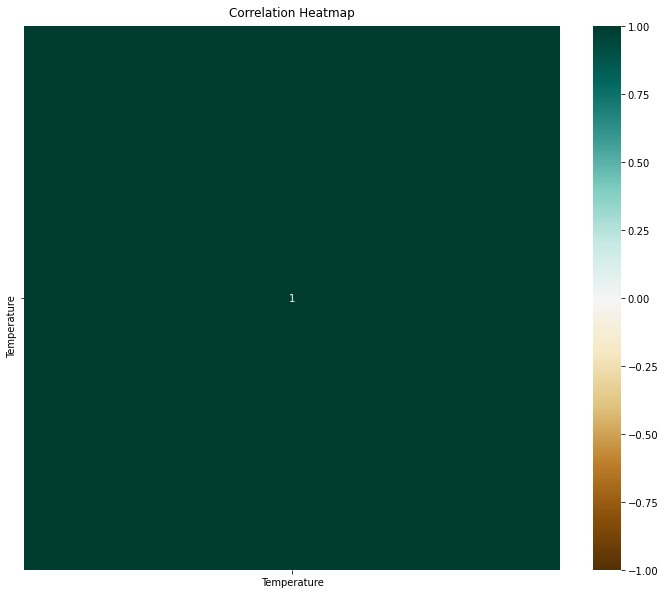

In [36]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

In [37]:
df[['Mode of Transport','Damage']]

,Mode of Transport,Damage
0,land,0
1,land,0
2,air,0
3,land,0
4,air,1
...,...,...
19996,land,0
19997,water,0
19998,air,1
19999,land,1


In [38]:
CrosstabResult=pd.crosstab(index=df['Fork Type'],columns=df['Damage'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.25 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(ChiSqResult)

Damage                      0    1  1
Fork Type                            
Counterbalance Forklift  2276  291  0
Industrial Forklift      2311  280  0
Pallet Jack              2210  259  1
Rough Terrain Forklift   2248  329  0
Side Loader              2104  251  0
Telehandler              2232  304  0
Walkie Stacker           2185  275  0
Warehouse Forklift       2169  276  0
The P-Value of the ChiSq Test is: 0.2537494100275413
(17.04572396035911, 0.2537494100275413, 14, array([[2.27617344e+03, 2.90698215e+02, 1.28343583e-01],
       [2.29745438e+03, 2.93416079e+02, 1.29543523e-01],
       [2.19016299e+03, 2.79713514e+02, 1.23493825e-01],
       [2.28504050e+03, 2.91830658e+02, 1.28843558e-01],
       [2.08819184e+03, 2.66690415e+02, 1.17744113e-01],
       [2.24868557e+03, 2.87187641e+02, 1.26793660e-01],
       [2.18129594e+03, 2.78581071e+02, 1.22993850e-01],
       [2.16799535e+03, 2.76882406e+02, 1.22243888e-01]]))


# Finding P-Value by using Chi-square test

In [40]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((9,9)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values)
chi2

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
container id,0.0,1.185259e+08,2.044102e+07,920046.000000,40002.000000,140007.000000,20001.000000,20001.000000,40002.000000
date,118525926.0,0.000000e+00,6.284196e+06,281436.535726,12285.679852,43026.833309,6103.599242,6271.182994,10906.895336
city,20441022.0,6.284196e+06,0.000000e+00,67854.791747,2173.887836,7523.279273,1059.233244,1044.948844,21026.992541
Temperature,920046.0,2.814365e+05,6.785479e+04,0.000000,86.606925,332.521098,27.144512,52.427500,28615.842220
Mode of Transport,40002.0,1.228568e+04,2.173888e+03,86.606925,0.000000,8.209481,1.178052,1.597606,6.492599
Fork Type,140007.0,4.302683e+04,7.523279e+03,332.521098,8.209481,0.000000,2.150495,8.735515,17.045724
External,20001.0,6.103599e+03,1.059233e+03,27.144512,1.178052,2.150495,0.000000,0.023332,1.337077
Refrigerated,20001.0,6.271183e+03,1.044949e+03,52.427500,1.597606,8.735515,0.023332,0.000000,2592.850568
Damage,40002.0,1.090690e+04,2.102699e+04,28615.842220,6.492599,17.045724,1.337077,2592.850568,0.000000


# Cramer's V Statistics for finding Correlation Heatmap between categorical attributes 

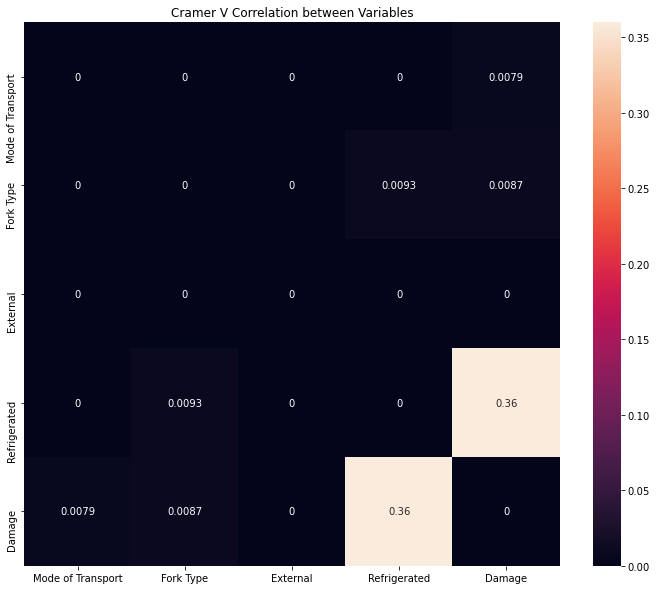

In [41]:
import scipy.stats as ss
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ["Mode of Transport", "Fork Type", "External", "Refrigerated", "Damage"]
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

# Visualizing the relation between Predictors and Predictand(Target Variable)

<Figure size 864x720 with 0 Axes>

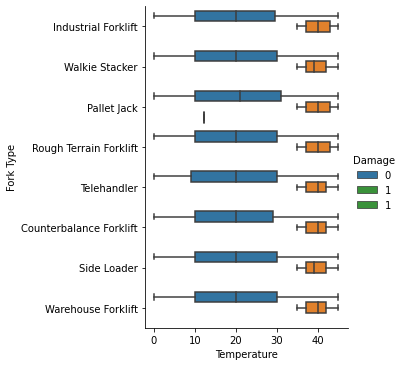

In [42]:
plt.figure(figsize=(12, 10))
sns.catplot(x="Temperature", y="Fork Type", hue="Damage", kind="box", data=df)

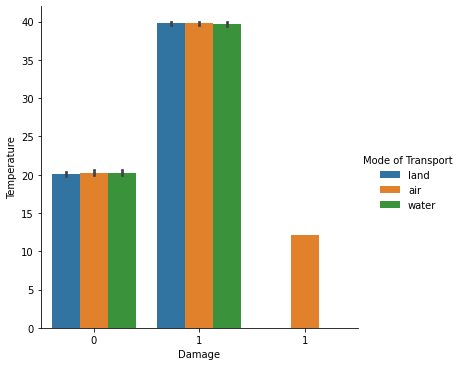

In [43]:
sns.catplot(x="Damage", y="Temperature", hue="Mode of Transport", kind="bar", data=df)

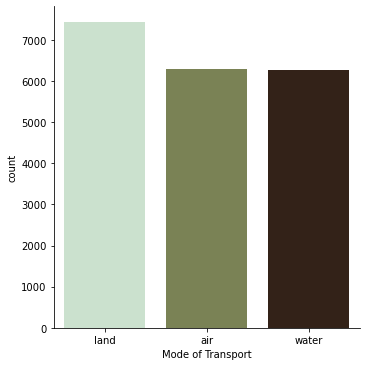

In [44]:
sns.catplot(x="Mode of Transport", kind="count", palette="ch:.95", data=df)

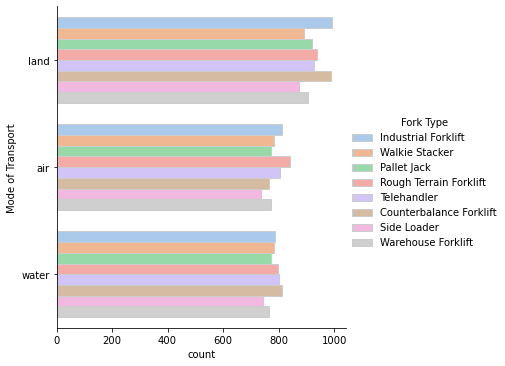

In [45]:
sns.catplot(y="Mode of Transport", hue="Fork Type", kind="count",
            palette="pastel", edgecolor=".8",
            data=df)

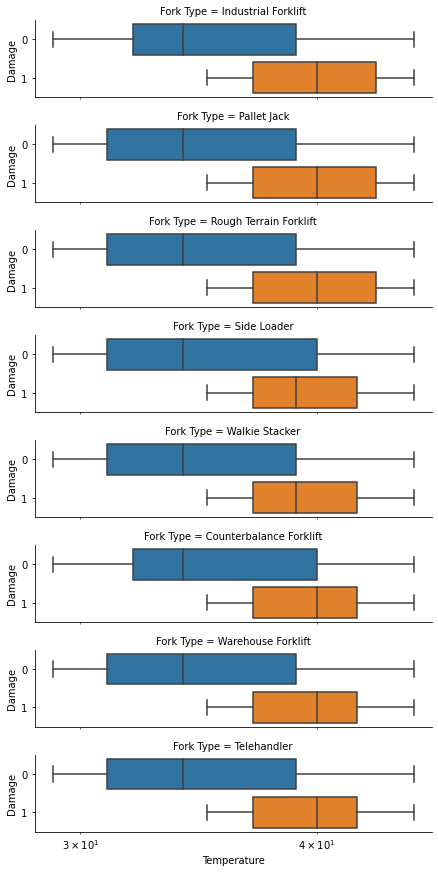

In [46]:
g = sns.catplot(x="Temperature", y="Damage", row="Fork Type",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("Temperature > 28"))
g.set(xscale="log")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   container id       20001 non-null  object 
 1   date               20001 non-null  object 
 2   city               20001 non-null  object 
 3   Temperature        20001 non-null  float64
 4   Mode of Transport  20001 non-null  object 
 5   Fork Type          20001 non-null  object 
 6   External           20001 non-null  object 
 7   Refrigerated       20001 non-null  object 
 8   Damage             20001 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


# Data Preparation by using Label encoding

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# columns to select for encoding
selected_col = ['Mode of Transport','Fork Type', 'External', 'Refrigerated']
le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)
print(df)

      container id        date        city  Temperature  Mode of Transport  \
0       VPYR190662  23-09-2010      Purnea        30.00                  1   
1       OAKF997890  15-10-2015      Joliet        12.00                  1   
2       TAUV405783  11-10-2008       Taber        37.00                  0   
3       FNBW586962  18-09-2022      Shimla         5.00                  1   
4       CWGP237272  06-11-2018       Miami        38.00                  0   
...            ...         ...         ...          ...                ...   
19996   AJOE772324  07-01-2009  Trivandrum        25.00                  1   
19997   XJEK284268  22-02-2017        Gary        39.00                  2   
19998   UMYR952437  18-03-2016    Haridwar        45.00                  0   
19999   DIBM828271  23-05-2017       Provo        44.00                  1   
20000   UACU518232  18-12-2021   New Delhi        12.09                  0   

       Fork Type  External  Refrigerated Damage  
0            

In [50]:
df

,container id,date,city,Temperature,Mode of Transport,Fork Type,External,Refrigerated,Damage
0,VPYR190662,23-09-2010,Purnea,30.00,1,1,0,0,0
1,OAKF997890,15-10-2015,Joliet,12.00,1,6,1,0,0
2,TAUV405783,11-10-2008,Taber,37.00,0,2,1,1,0
3,FNBW586962,18-09-2022,Shimla,5.00,1,2,0,0,0
4,CWGP237272,06-11-2018,Miami,38.00,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...
19996,AJOE772324,07-01-2009,Trivandrum,25.00,1,6,1,1,0
19997,XJEK284268,22-02-2017,Gary,39.00,2,5,1,1,0
19998,UMYR952437,18-03-2016,Haridwar,45.00,0,3,1,0,1
19999,DIBM828271,23-05-2017,Provo,44.00,1,0,1,0,1


# Data Modelling 
# Decision Tree Classifier 

In [51]:
X = df.iloc[:,7].values 
y = df.iloc[:,8].values
y=y.astype('int')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [53]:
X_train.reshape(-1,1)

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [54]:
type(X_train.reshape(-1,1))

numpy.ndarray

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train.reshape(-1,1), y_train)

DecisionTreeClassifier()

In [56]:
pred = classifier.predict(X_test.reshape(-1,1))

In [57]:
(y_test == pred).mean()*100

88.87778055486129

# Plotting the Decision Tree 

In [58]:
from sklearn import tree

In [59]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test.reshape(-1,1), y_test)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.198\nsamples = 4001\nvalue = [3556, 445]'),
 Text(83.7, 54.360000000000014, 'gini = 0.341\nsamples = 2039\nvalue = [1594, 445]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1962\nvalue = [1962, 0]')]

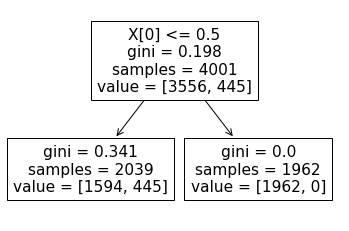

In [60]:
tree.plot_tree(clf)

# Applying Support Vector Classifier 

In [140]:
X = df[['Refrigerated']].values
y = df['Damage'].values
y=y.astype('int')

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [196]:
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
#Create a svm Classifier

clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [199]:
from sklearn.metrics import  classification_report
print ('\n Clasification report:\n', classification_report(y_test,y_pred))


 Clasification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3556
           1       0.00      0.00      0.00       445

    accuracy                           0.89      4001
   macro avg       0.44      0.50      0.47      4001
weighted avg       0.79      0.89      0.84      4001

